## Data Loading

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:

df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# select longitude, latitude, median_house_value
house_data = pd.read_csv("housing.csv", usecols=["longitude", "latitude", "median_house_value"])
house_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


## Data Visualization

<Axes: xlabel='longitude', ylabel='latitude'>

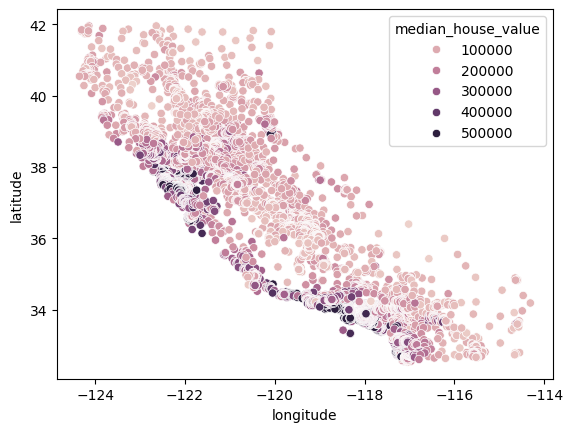

In [5]:
# use seaborn scatter plot with the hue = median_house_value
sns.scatterplot(data=house_data, x="longitude", y="latitude", hue="median_house_value")

## Data Preprocessing

In [6]:
# Train test split

X = house_data[["longitude", "latitude"]]
y = house_data["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement the model

In [12]:
# kMeans model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=11, n_init='auto')
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=11)

<Axes: xlabel='longitude', ylabel='latitude'>

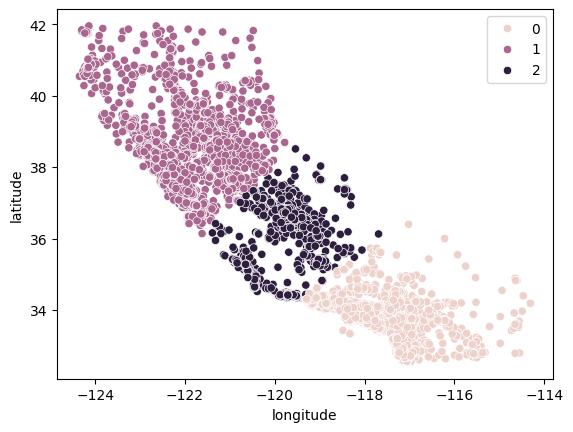

In [13]:
sns.scatterplot(data=X_train, x="longitude", y="latitude", hue=kmeans.labels_)

<Axes: ylabel='median_house_value'>

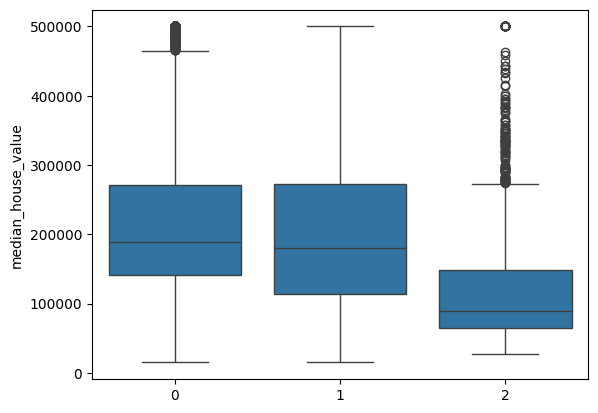

In [18]:
# seaborn box plot to visualize cluster distribution
sns.boxplot(x=kmeans.labels_, y=y_train)

## Calculate Model Performance

In [19]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_scaled, kmeans.labels_, metric="euclidean")


0.6462781860873846

## Selection of best number of clusters

In [20]:
# use elbow method to find the optimal number of clusters

k =range(1,15)
fits = []
score = []

for i in k:
    # train the model for current value of k on training data
    model = KMeans(n_clusters=i, random_state=11, n_init='auto').fit(X_train_scaled)

    #append the model to fits
    fits.append(model)

    # append the silhouette score to score
    score.append(model.inertia_)

<Axes: >

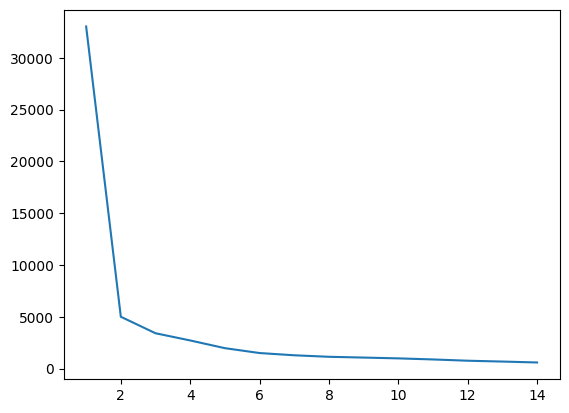

In [21]:
# plot elbow curve
sns.lineplot(x=k, y=score)

In [22]:
# use selected k =2

kmeans = KMeans(n_clusters=2, random_state=11, n_init='auto')
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2, random_state=11)

In [23]:
silhouette_score(X_train_scaled, kmeans.labels_, metric="euclidean")

0.7544475688410042

<Axes: xlabel='longitude', ylabel='latitude'>

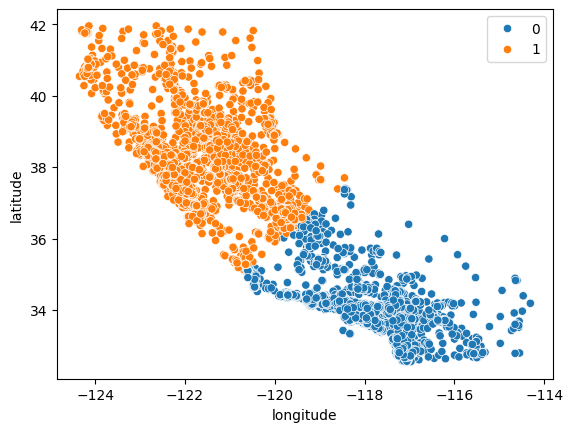

In [25]:
# display  the cluster scatter plot
sns.scatterplot(data=X_train, x="longitude", y="latitude", hue=kmeans.labels_)